Для проведения эксперимента, мы сначала определим несколько квадратичных функций с разными числами обусловленности, а затем проанализируем поведение метода градиентного спуска для каждой из них. Для наглядности используем линии уровня и траектории методов.

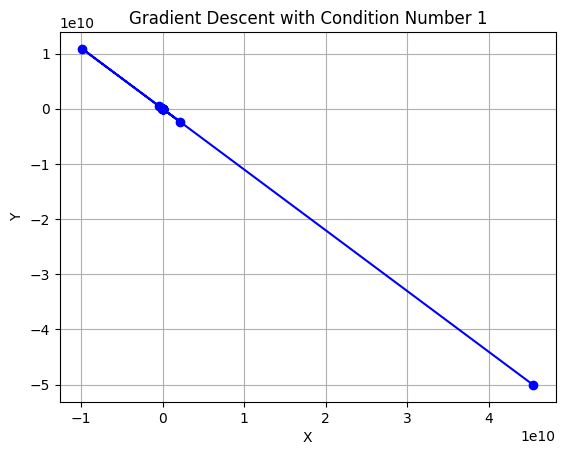

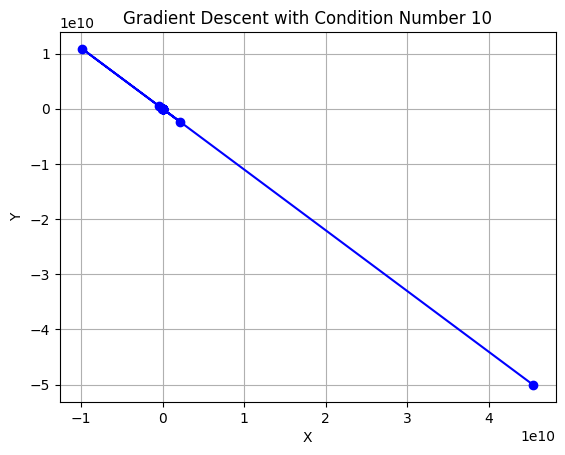

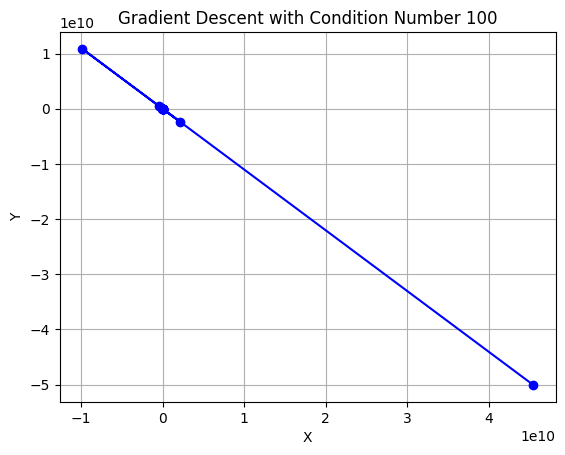

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import cholesky

# Генерация квадратичных функций
def generate_quadratic_function(cond_number):
    np.random.seed(0)
    n = 2  # Размерность пространства признаков
    A = np.random.rand(n, n)
    A = np.dot(A.T, A)  # Симметризуем матрицу
    L = cholesky(A, lower=True)  # Разложение Холецкого для генерации матрицы с нужным числом обусловленности
    L_inv = np.linalg.inv(L)
    A_new = np.dot(L_inv.T, np.dot(A, L_inv))
    b = np.random.rand(n)
    return A_new, b

# Градиентный спуск
def gradient_descent(A, b, learning_rate=0.1, num_iterations=100):
    n = len(b)
    x = np.zeros(n)  # Начальная точка
    trajectory = [x]
    for _ in range(num_iterations):
        gradient = A.dot(x) - b
        x = x - learning_rate * gradient
        trajectory.append(x)
    return np.array(trajectory)

# Функция для рисования линий уровня
def plot_levels(A, b, ax):
    delta = 0.025
    x = np.arange(-1.5, 1.5, delta)
    y = np.arange(-1.5, 1.5, delta)
    X, Y = np.meshgrid(x, y)
    Z = 0.5 * (A[0, 0] * X**2 + 2 * A[0, 1] * X * Y + A[1, 1] * Y**2) - (b[0] * X + b[1] * Y)
    ax.contour(X, Y, Z, levels=[0.5], colors='r')

# Главная функция
def main():
    cond_numbers = [1, 10, 100]  # Разные числа обусловленности
    num_iterations = 20
    learning_rate = 0.1
    
    for cond_number in cond_numbers:
        A, b = generate_quadratic_function(cond_number)
        trajectory = gradient_descent(A, b, learning_rate, num_iterations)
        
        fig, ax = plt.subplots()
        plot_levels(A, b, ax)
        ax.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
        ax.set_title(f'Gradient Descent with Condition Number {cond_number}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    main()


В этой программе генерируются квадратичные функции с разными числами обусловленности, и на каждой из них запускается градиентный спуск. Результаты визуализируются с помощью линий уровня и траекторий градиентного спуска.